<a href="https://colab.research.google.com/github/yaakoubiIheb/Disease_Prediction/blob/main/Data_Augmentation_Project_Iheb_Yakoubi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                **Data Augmentation**





**The performance of most ML models, and deep learning models in particular, depends on the quality, quantity and relevancy of training data. However, insufficient data is one of the most common challenges in implementing machine learning in the enterprise. This is because collecting such data can be costly and time-consuming in many cases.**

**Companies can leverage data augmentation to reduce reliance on training data collection and preparation and to build more accurate machine learning models faster.**



### **What is data augmentation ?**

**Data augmentation is a set of techniques to artificially increase the amount of data by generating new data points from existing data. This includes making small changes to data or using deep learning models to generate new data points.**

### **Why is it important now ?**

**Machine learning applications especially in the deep learning domain continue to diversify and increase rapidly. Data-centric approaches to model development such as data augmentation techniques can be a good tool against challenges which the artificial intelligence world faces.**

**Data augmentation is useful to improve performance and outcomes of machine learning models by forming new and different examples to train datasets. If the dataset in a machine learning model is rich and sufficient, the model performs better and more accurately.**

**For machine learning models, collecting and labeling of data can be exhausting and costly processes. Transformations in datasets by using data augmentation techniques allow companies to reduce these operational costs.**

**One of the steps into a data model is cleaning data which is necessary for high accuracy models. However, if cleaning reduces the representability of data, then the model cannot provide good predictions for real world inputs. Data augmentation techniques can enable machine learning models to be more robust by creating variations that the model may see in the real world.**

### **How does it work ?**

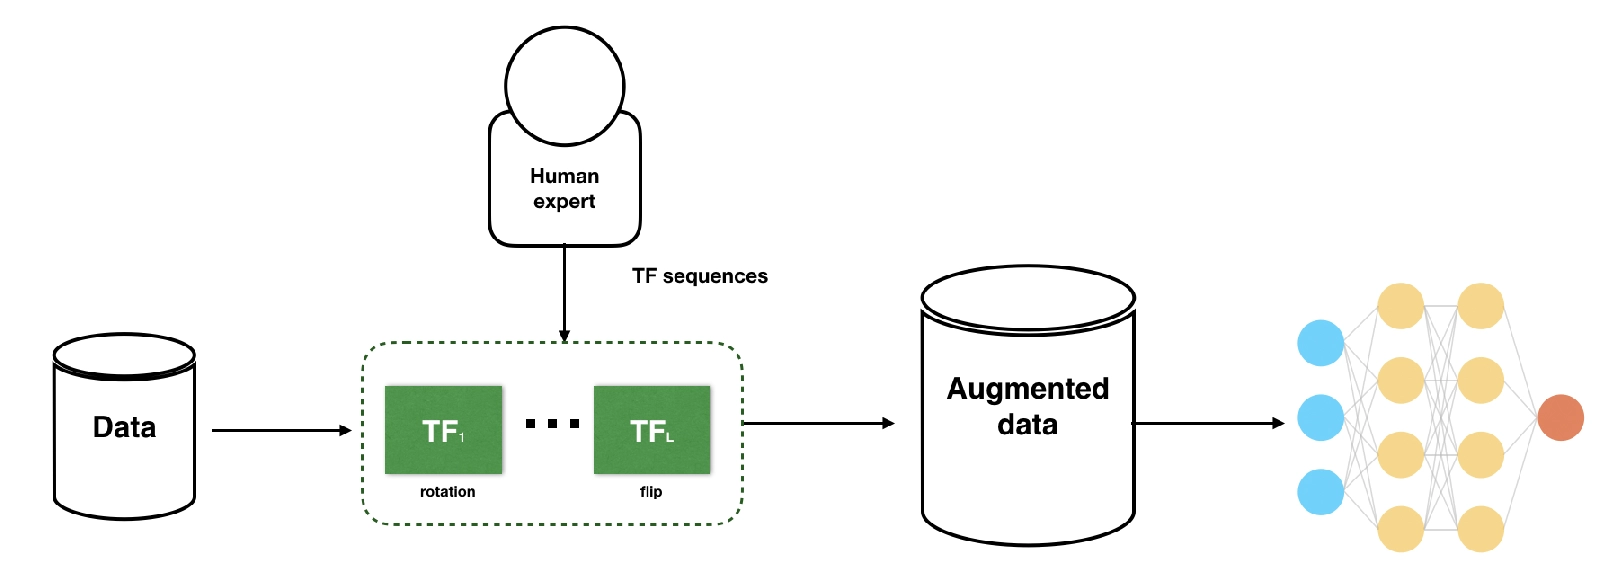

Source: The Stanford AI Lab Blog, (Note: TF – transformation functions)

### **For image classification and segmentation**

**For data augmentation, making simple alterations on visual data is popular. In addition, generative adversarial networks (GANs) are used to create new synthetic data. Classic image processing activities for data augmentation are:**

*   padding
* random rotating
* re-scaling,
* vertical and horizontal flipping
* translation ( image is moved along X, Y direction)
* cropping
* zooming
* darkening & brightening/color modification
* grayscaling
* changing contrast
* adding noise
* random erasing

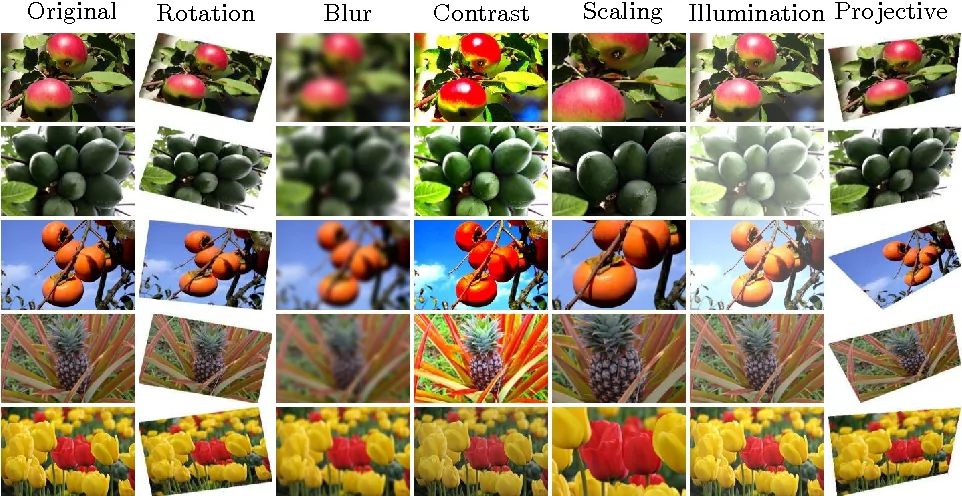

### **What are the benefits of data augmentation ?**

**Benefits of data augmentation include:**

* Improving model prediction accuracy
   * adding more training data into the models
   * preventing data scarcity for better models
   * reducing data overfitting ( i.e. an error in statistics, it means a        function corresponds too closely to a limited set of data points) and creating variability in data
increasing generalization ability of the models
   * helping resolve class imbalance issues in classification
* Reducing costs of collecting and labeling data
* Enables rare event prediction
* Prevents data privacy problems

### **What are the challenges of data augmentation ?**

* Companies need to build evaluation systems for the quality of augmented datasets. As use of data augmentation methods increases, assessment of quality of their output will be required.
* Data augmentation domain needs to develop new research and studies to create new/synthetic data with advanced applications. For example, generation of high-resolution images by using GANs can be challenging.
* If a real dataset contains biases, data augmented from it will contain biases, too. So, identification of optimal data augmentation strategy is important.

### **For a practical example of the importance of data augmentation we will create a model which capable of predicting any number in an image even if it is not clear or transformed to imitate the actual use of ai models in the production world.**

### **We will be using the mnist dataset and the data augmentation technics that we mention before.**

### **What is MNIST dataset ?**

**The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.**

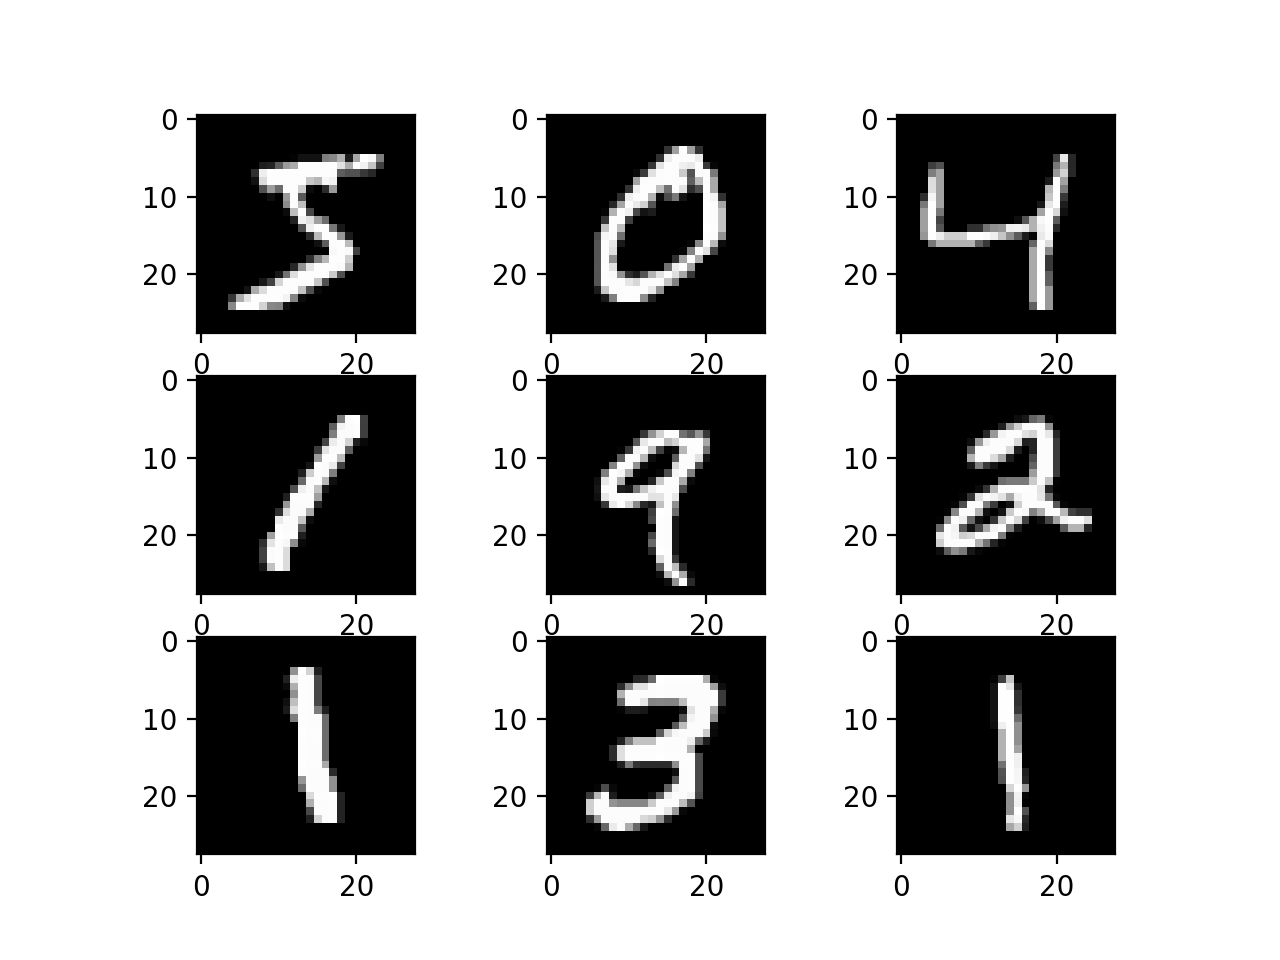

****Importing the models that we will use later on****

In [ ]:
from tensorflow.keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from google.colab.patches import cv2_imshow
from google.colab.patches import cv2
import imutils
import numpy as np   
from PIL import Image
import random

**Loading the data**

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()



**The mnist dataset has 60000 images and that's a lot so we will take just 1000 image to train the model (to not overfit our model) and 250 image to test it** 

In [ ]:
x_train=x_train[:1000]
y_train=y_train[:1000]

x_test=x_test[:250]
y_test=y_test[:250]


**Preparing the data to be fitted into the model**

In [ ]:
# Reshape the input data to 2d arrays

x_train_2d = x_train.reshape(x_train.shape[0], (x_train.shape[1]*x_train.shape[2]))
x_test_2d = x_test.reshape(x_test.shape[0], (x_test.shape[1]*x_test.shape[2]))


 **Now we will check the accuracy of different machine learning algorithms without the data augmentation**

In [ ]:
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(x_train_2d, y_train)

logreg.score(x_test_2d, y_test)


0.86

In [ ]:
# Support Vector Machines

svc = SVC()

svc.fit(x_train_2d, y_train)


svc.score(x_test_2d, y_test)

0.904

In [ ]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(x_train_2d, y_train)

random_forest.score(x_test_2d, y_test)

0.888

In [ ]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(x_train_2d, y_train)

knn.score(x_test_2d, y_test)

0.836

**We can notice that all the algorithms scores are close but because the svc algorithm scored the highest one we will use it for the rest of this project**

**We are happy by the high accuracy of our models but let's try one more test before we celebrate**

**For that we will tranform our test images using those technics so they don't be a carbon copy of those we trained our models with.**

 **Blurring the images with random intensity**

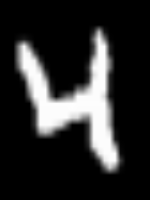

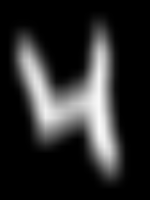

In [ ]:
image=x_train[20]
img = cv2.resize(image, (150, 200))
cv2_imshow(img)

def random_blur(image):
  return cv2.blur(image, (random.randint(2,7),random.randint(2,7)))
  

# To blur the image
bimage = random_blur(image)
# Resize the image
img = cv2.resize(bimage, (150, 200))
# To display the blurred image
cv2_imshow(img)

**Randomly rotating the images**

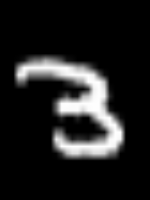

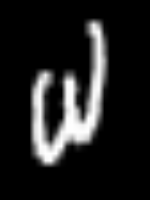

In [ ]:
def random_rotate(image):
  x=random.randint(1,3)
  if(x==1):
    return cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
  elif(x==2):
    return cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
  else:
    return cv2.rotate(image, cv2.ROTATE_180)


image=x_train[250]
img = cv2.resize(image, (150, 200))
cv2_imshow(img)


rotated = random_rotate(image)
img = cv2.resize(rotated, (150, 200))
cv2_imshow(img)


**Shifting the images in random directions**

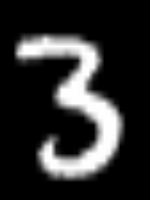

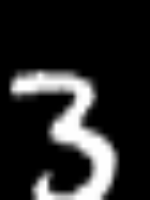

In [ ]:

#we are going to create a function that randomly shift the image 6 pixels in all directions
def random_shift(image):
  random_x=random.randint(-6,6)
  random_y=random.randint(-6,6)
  return imutils.translate(image, random_x, random_y)


image=x_train[12]
shifted = random_shift(image)
img = cv2.resize(shifted, (150, 200))
cv2_imshow(cv2.resize(image, (150, 200)))
cv2_imshow(img)

**Zooming the images randomly**

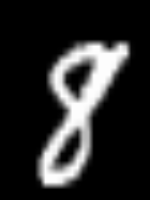

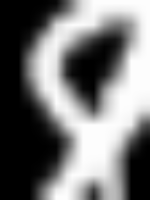

In [ ]:
def zoom(img, zoom_factor=0):

    if zoom_factor == 0:
        return img


    height, width = img.shape[:2] # It's also the final desired shape
    new_height, new_width = int(height * zoom_factor), int(width * zoom_factor)
    
    ### Crop only the part that will remain in the result (more efficient)
    # Centered bbox of the final desired size in resized (larger/smaller) image coordinates
    y1, x1 = max(0, new_height - height) // 2, max(0, new_width - width) // 2
    y2, x2 = y1 + height, x1 + width
    bbox = np.array([y1,x1,y2,x2])
    # Map back to original image coordinates
    bbox = (bbox / zoom_factor).astype(np.int)
    y1, x1, y2, x2 = bbox
    cropped_img = img[y1:y2, x1:x2]
    
    # Handle padding when downscaling
    resize_height, resize_width = min(new_height, height), min(new_width, width)
    pad_height1, pad_width1 = (height - resize_height) // 2, (width - resize_width) //2
    pad_height2, pad_width2 = (height - resize_height) - pad_height1, (width - resize_width) - pad_width1
    pad_spec = [(pad_height1, pad_height2), (pad_width1, pad_width2)] + [(0,0)] * (img.ndim - 2)
    
    result = cv2.resize(cropped_img, (resize_width, resize_height))
    result = np.pad(result, pad_spec, mode='constant')
    assert result.shape[0] == height and result.shape[1] == width
    return result



def random_zoom(image):
  random_z=random.uniform(1.1,2.5)
  return zoom(image, random_z)


image=x_train[55]
img = cv2.resize(image, (150, 200))
cv2_imshow(img) 
img = cv2.resize(random_zoom(image), (150, 200))
cv2_imshow(img)

**Now let's apply those technics to our test dataset and re-evaluate our svc model**

In [ ]:
for i in range (50,100):
  x_test[i]=random_blur(x_test[i])

for i in range (100,150):
  x_test[i]=random_rotate(x_test[i])

for i in range (150,200):
  x_test[i]=random_shift(x_test[i])

for i in range (150,200):
  x_test[i]=random_zoom(x_test[i])


x_test_2d = x_test.reshape(x_test.shape[0], (x_test.shape[1]*x_test.shape[2]))
svc.score(x_test_2d, y_test)

0.572

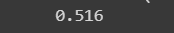  

**In my case the model score dropped massively from 0.90 to 0.51 bacause most of the images we tested our model with are new to it and that's what will happens in its production use**

**Using the data augmentation techniques we explore before we will augment our train data then try again training and testing our model**

**this time we will use 20000 images from the mnist dataset and we will augment 16000 of them**

In [ ]:
(x_train, y_train),(a,b) = mnist.load_data()

x_train=x_train[:20000]
y_train=y_train[:20000]

x_train_2d = x_train.reshape(x_train.shape[0], (x_train.shape[1]*x_train.shape[2]))

In [ ]:
for i in range (4000,8000):
  x_train[i]=random_blur(x_train[i])

for i in range (8000,12000):
  x_train[i]=random_rotate(x_train[i])

for i in range (12000,16000):
  x_train[i]=random_shift(x_train[i])

for i in range (16000,20000):
  x_train[i]=random_zoom(x_train[i])

x_train_2d = x_train.reshape(x_train.shape[0], (x_train.shape[1]*x_train.shape[2]))
x_test_2d = x_test.reshape(x_test.shape[0], (x_test.shape[1]*x_test.shape[2]))

svc.fit(x_train_2d, y_train)
svc.score(x_test_2d, y_test)

0.792

image.png

**Et voila.. We actually improved the model accuracy by an excelent margin(nearly 30% improvement in my case ) and if we even augmented more data it will increases even more.**

**In this project we explore the data augmentation techniques and advantages and applied it in a real life scenario**

**Thank you for your attention**